# Project Starter

We start this project by importing the necessary tools needed in general to start data analysis and we will do so later below when needed.

Furthermore, we need to load the data into a Dataframe to work on it without affecting the main file.


In [1]:
# Import necessary libraries to start the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data in a dataframe
df = pd.read_csv("./data/raw/thyroidDF.csv")

# Data Exploration

Before cleaning, We need to investigate the data even further to understand its structure and identify any issues that need to be addressed.


In [3]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

As it appears, the dataset has some issues that need to be addressed before training a model. like null values in some columns and missing values in some rows.

The dataset has some categorical columns that need to be encoded. and some columns that are not relevant to the model.


In [5]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


The `df.describe()` output reveals several key characteristics of the numerical data:
- **Numerical Features:** The dataset contains numerical features such as 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', and 'patient_id'.

- **Outliers:** There are significant outliers in several columns. Notably, 'age' has a maximum value of 65526, which is highly improbable and suggests data entry errors or anomalous records. Other columns like 'TSH', 'TT4', and 'FTI' also show maximum values that are considerably higher than their 75th percentile, indicating potential outliers.

- **Missing Values:** Several columns have a lower count than the total number of entries (9172), indicating the presence of missing values. 'TBG' has a particularly high number of missing values (only 349 non-null out of 9172 entries).

- **Scale Differences:** The ranges of values vary widely across different features, which might necessitate scaling for certain machine learning models.

- **Patient ID:** The 'patient_id' column is a unique identifier and is not a feature relevant for statistical analysis or model training.

In [6]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [8]:
# Show columns with missing values only
missing_columns = df.columns[df.isnull().any()]
missing_counts = df[missing_columns].isnull().sum()
missing_counts

sex     307
TSH     842
T3     2604
TT4     442
T4U     809
FTI     802
TBG    8823
dtype: int64

# The "Missingness Relationship" Test (Correlation of Nulls)

In medical data, things aren't usually missing by accident. Doctors only order certain tests (like T3) if others (like TSH) are abnormal.

- The Test: Create a heatmap of "missingness" to see if the absence of one hormone correlates with the absence of another.

- Why: If two columns are always missing together, they might be redundant or part of the same lab panel.


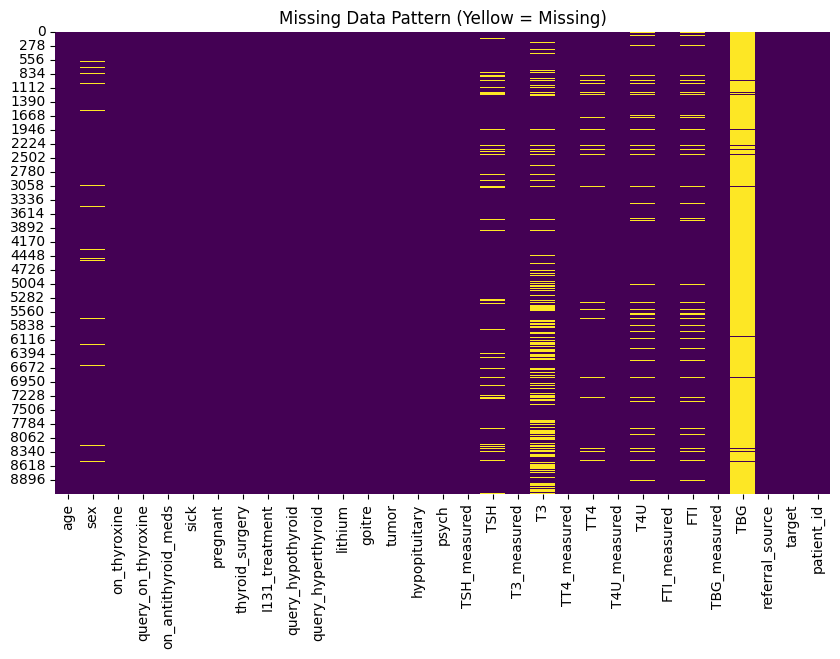

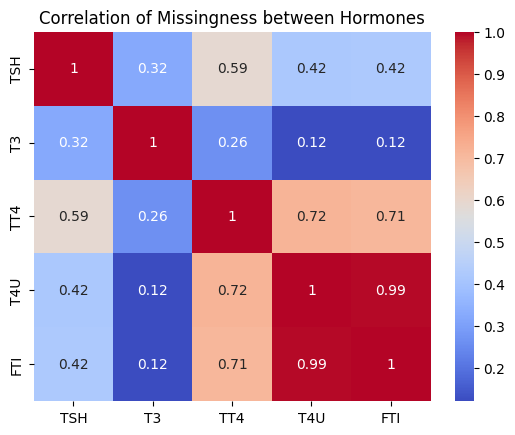

In [10]:
# Test: Correlation of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Pattern (Yellow = Missing)')
plt.show()

# Quantitative correlation of nulls
null_corr = df[['TSH', 'T3', 'TT4', 'T4U', 'FTI']].isnull().corr()
sns.heatmap(null_corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Missingness between Hormones')
plt.show()

**Conclusion**

The dataset exhibits "Missing Not At Random" (MNAR) patterns, specifically within the hormone profiles. A high missingness correlation (r = 0.99) exists between `T4U` and `FTI`, indicating these features are systematically recorded as a pair.

Conversely, `TBG` is nearly 100% null across the set, suggesting it may need to be dropped during feature selection. The demographic and clinical flag columns remain complete, providing a stable foundation for stratified imputation or analysis.

# Feature Variance Text

Some columns might have the same value for 99% of patients.

- The Test: Calculate the "Value Diversity" (Variance) for categorical and numerical columns.

- Why: A column like hypopituitary might only have 2 "True" values in 9,000 rows. This feature has Low Variance and can actually confuse a model rather than help it.


In [11]:
# Test: Percentage of the most frequent value
for col in df.columns:
    top_val_pct = df[col].value_counts(normalize=True).iloc[0] * 100
    if top_val_pct > 99:
        print(f"Warning: {col} is {top_val_pct:.2f}% identical values. (Low Variance)")

# Group-Wise Outlier Test (Conditional Outliers)

A TSH of 6.0 is an outlier for a healthy person, but it is perfectly normal for someone in the "Hypothyroid" group.

- The Test: Identify outliers within each target group instead of the whole dataset.

- Why: This distinguishes "Sick patients" (Expected extreme values) from "Data Errors" (Values that make no sense even for a sick person).


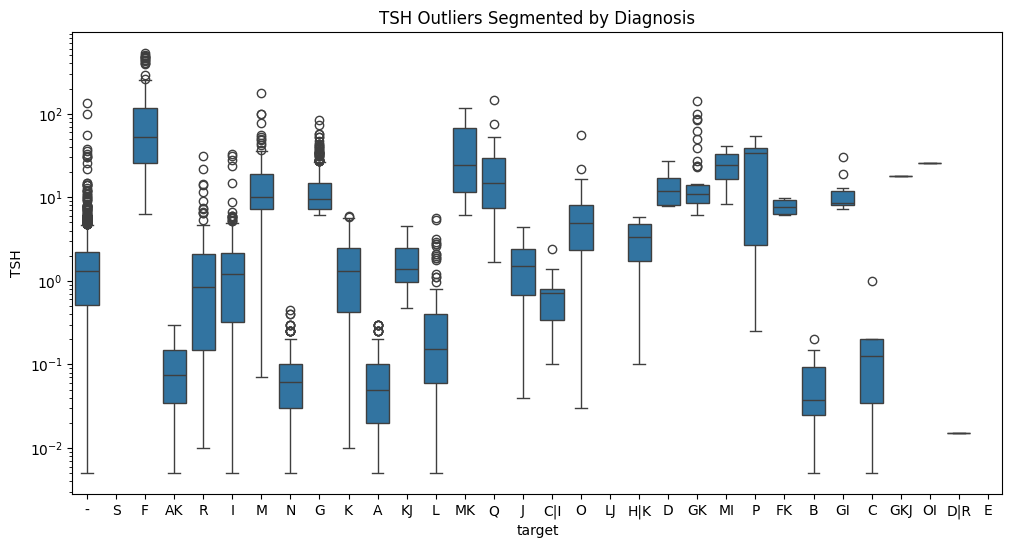

In [12]:
# Test: TSH Outliers by Target Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='target', y='TSH')
plt.yscale('log')
plt.title('TSH Outliers Segmented by Diagnosis')
plt.show()

The Boxplot illustrates how TSH levels serve as a primary separator for the target categories:

- **High TSH (Hypothyroidism)**: Categories like F and MK show significantly elevated TSH levels (often exceeding $10^1$ or $10^2$ mIU/L), which is a classic indicator of an underactive thyroid.

- **Low TSH (Hyperthyroidism)**: Conversely, categories like A, B, and N show TSH levels suppressed below $10^{-1}$, typical for an overactive thyroid.

- **The Logarithmic Scale**: Note that TSH is plotted on a log scale; this is necessary because clinical TSH values can span four orders of magnitude, and the outliers in this dataset are extreme.

# Detecting Outliers in the dataset


In [14]:
from scipy import stats

# 1. Select only numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# We usually exclude 'patient_id' from outlier analysis
if 'patient_id' in numeric_cols: numeric_cols.remove('patient_id')

outlier_summary = []

for col in numeric_cols:
    # Drop NaNs for the calculation
    data = df[col].dropna()
    
    # --- IQR Test ---
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    
    # --- Z-Score Test ---
    z_scores = np.abs(stats.zscore(data))
    z_outliers = data[z_scores > 3]
    
    outlier_summary.append({
        'Column': col,
        'IQR Outliers': len(iqr_outliers),
        'Z-Score Outliers': len(z_outliers),
        'Min': data.min(),
        'Max': data.max()
    })

# Display the summary table
outlier_results = pd.DataFrame(outlier_summary)
print(outlier_results)

  Column  IQR Outliers  Z-Score Outliers    Min       Max
0    age             4                 3  1.000  65526.00
1    TSH           884               100  0.005    530.00
2     T3           360                86  0.050     18.00
3    TT4           422               101  2.000    600.00
4    T4U           420               172  0.170      2.33
5    FTI           501                95  1.400    881.00
6    TBG            29                11  0.100    200.00


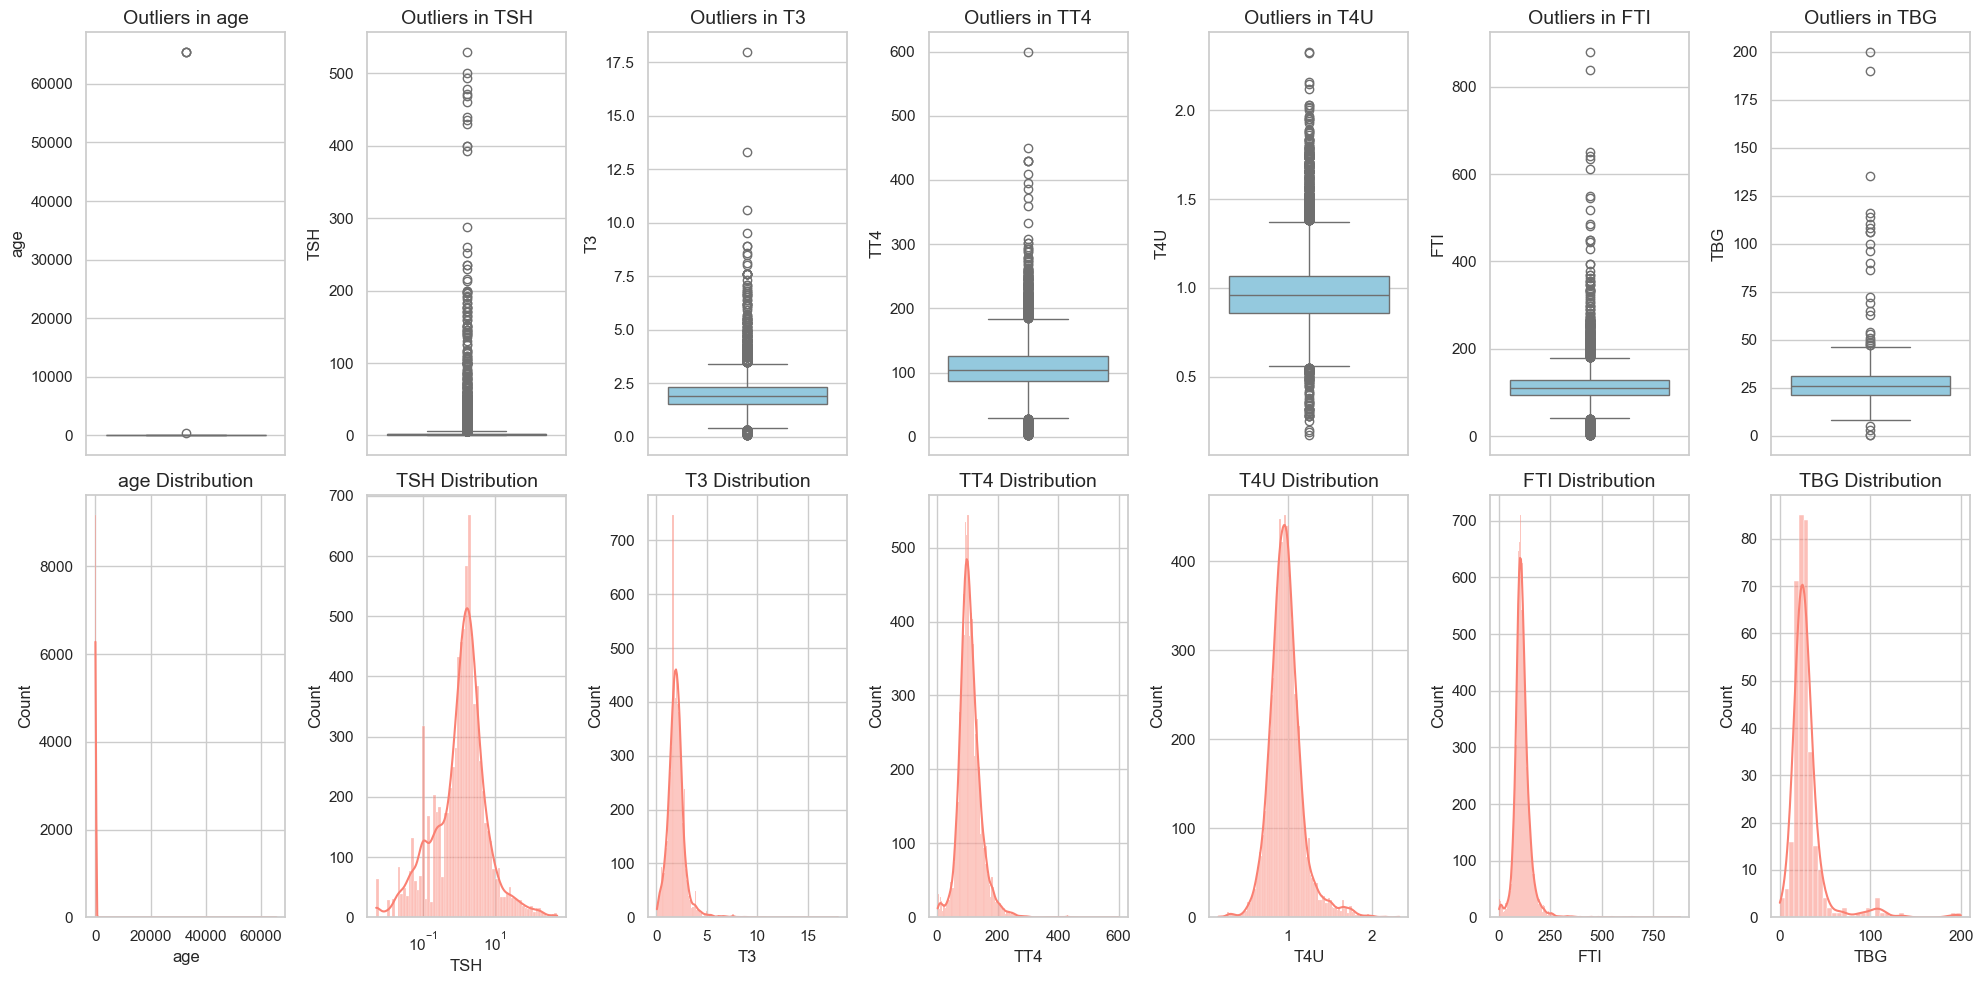

In [15]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create a figure with subplots
# We'll make a 2-row grid (one row for Boxplots, one for Histograms)
fig, axes = plt.subplots(nrows=2, ncols=len(numeric_cols), figsize=(20, 10))

for i, col in enumerate(numeric_cols):
    # Row 1: Boxplots
    sns.boxplot(data=df, y=col, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Outliers in {col}', fontsize=14)
    
    # Row 2: Distribution/Histograms
    # Note: TSH is often log-scaled in medicine because it varies so much
    log_scale = True if col == 'TSH' else False
    sns.histplot(df[col].dropna(), kde=True, ax=axes[1, i], color='salmon', log_scale=log_scale)
    axes[1, i].set_title(f'{col} Distribution', fontsize=14)

plt.tight_layout()
plt.show()

**Interpreting Outliers**

1. The Error Outlier (age): You will see a single point way above the others (the 65,000 alue). This is a "Global Outlier" and must be removed.

2. The Clinical Outlier (TSH): You will see hundreds of points outside the whiskers.These are "Natural Outliers." In a normal person, TSH is $0.4 - 4.0$. In a sick person, it can be $400$. We keep these because they define the disease.

3. The Measurement Outlier (T4U): You will see a few points that look slightly far away. These are often "Influential Points" that might need Transformation (like Log or Scaling) rather than deletion.


# "Measured" vs. "Value" Consistency


Check if every hormone level has a corresponding **\_measured** flag. We need to ensure there are no "Ghost Values" or "False Nulls". <br>

- If **\_measured** is "f". then the column must be empty. Conversely, if **TSH_measured** is "t", then **TSH** must have a number.

- If a number where the flag says "not measured", that data point is unreliable.


In [16]:
def check_measured_vs_value_consistency(df):
    """
    Check for consistency between 'measured' and 'value' columns in the dataframe.
    For each hormone (TSH, T3, TT4, T4U, FTI, TBG), ensure that if measured is 'f', 
    then the value column should be NaN. If measured is 't', the value should not be NaN.
    """
    inconsistencies = []
    
    # Define hormone-measured pairs
    hormone_pairs = [
        ('TSH_measured', 'TSH'),
        ('T3_measured', 'T3'),
        ('TT4_measured', 'TT4'),
        ('T4U_measured', 'T4U'),
        ('FTI_measured', 'FTI'),
        ('TBG_measured', 'TBG')
    ]
    
    for measured_col, value_col in hormone_pairs:
        if measured_col in df.columns and value_col in df.columns:
            # Check: measured='f' but value is not NaN (ghost values)
            ghost_values = df[(df[measured_col] == 'f') & (df[value_col].notna())]
            if not ghost_values.empty:
                inconsistencies.append({
                    'type': 'ghost_values',
                    'measured_col': measured_col,
                    'value_col': value_col,
                    'count': len(ghost_values),
                    'indices': ghost_values.index.tolist()[:10]  # First 10 indices
                })
            
            # Check: measured='t' but value is NaN (false nulls)
            false_nulls = df[(df[measured_col] == 't') & (df[value_col].isna())]
            if not false_nulls.empty:
                inconsistencies.append({
                    'type': 'false_nulls',
                    'measured_col': measured_col,
                    'value_col': value_col,
                    'count': len(false_nulls),
                    'indices': false_nulls.index.tolist()[:10]  # First 10 indices
                })
    
    return inconsistencies

In [17]:
# Run the measured vs value consistency test
inconsistencies = check_measured_vs_value_consistency(df)
print("Measured vs Value Consistency Test Results:")
print(len(inconsistencies), "Case found.")

Measured vs Value Consistency Test Results:
0 Case found.


# Physiological Relationship Test


The thyroid operates on a negative feedback loop with the pituitary gland.

- The Test: Check for "Extreme Contradictions." For example, a patient with High TSH (brain signaling for more) should generally have Low T4/FTI (thyroid failing to produce).

- Why: If you see a patient with extremely high TSH and extremely high T4, and they are not marked as pregnant or having a tumor, it might be a data entry error or a very rare secondary condition that requires special handling.


In [18]:
def check_physiological_contradictions(df):
    """
    Check for extreme physiological contradictions in thyroid hormone levels.
    The thyroid operates on a negative feedback loop: High TSH should generally correlate with Low T4/FTI.
    """
    contradictions = []
    
    # Define thresholds for "extreme" values (using percentiles from the data)
    tsh_high_threshold = df['TSH'].quantile(0.95)  # 95th percentile
    tsh_low_threshold = df['TSH'].quantile(0.05)   # 5th percentile
    t4_high_threshold = df['TT4'].quantile(0.95)   # 95th percentile
    t4_low_threshold = df['TT4'].quantile(0.05)    # 5th percentile
    fti_high_threshold = df['FTI'].quantile(0.95)  # 95th percentile
    fti_low_threshold = df['FTI'].quantile(0.05)   # 5th percentile
    
    print(f"Thresholds:")
    print(f"TSH: High > {tsh_high_threshold:.2f}, Low < {tsh_low_threshold:.2f}")
    print(f"TT4: High > {t4_high_threshold:.2f}, Low < {t4_low_threshold:.2f}")
    print(f"FTI: High > {fti_high_threshold:.2f}, Low < {fti_low_threshold:.2f}")
    
    # Check for extreme contradictions
    # 1. High TSH + High TT4 (shouldn't happen normally)
    high_tsh_high_t4 = df[
        (df['TSH'] > tsh_high_threshold) & 
        (df['TT4'] > t4_high_threshold) &
        (df['pregnant'] == 'f') &  # Exclude pregnancy
        (df['tumor'] == 'f')       # Exclude tumors
    ]
    
    if not high_tsh_high_t4.empty:
        contradictions.append({
            'type': 'high_tsh_high_t4',
            'count': len(high_tsh_high_t4),
            'description': 'High TSH with High TT4 (physiologically unusual)',
            'indices': high_tsh_high_t4.index.tolist()[:5]
        })
    
    # 2. High TSH + High FTI
    high_tsh_high_fti = df[
        (df['TSH'] > tsh_high_threshold) & 
        (df['FTI'] > fti_high_threshold) &
        (df['pregnant'] == 'f') &
        (df['tumor'] == 'f')
    ]
    
    if not high_tsh_high_fti.empty:
        contradictions.append({
            'type': 'high_tsh_high_fti',
            'count': len(high_tsh_high_fti),
            'description': 'High TSH with High FTI (physiologically unusual)',
            'indices': high_tsh_high_fti.index.tolist()[:5]
        })
    
    # 3. Low TSH + Low TT4 (could indicate secondary hypothyroidism)
    low_tsh_low_t4 = df[
        (df['TSH'] < tsh_low_threshold) & 
        (df['TT4'] < t4_low_threshold) &
        (df['pregnant'] == 'f') &
        (df['tumor'] == 'f')
    ]
    
    if not low_tsh_low_t4.empty:
        contradictions.append({
            'type': 'low_tsh_low_t4',
            'count': len(low_tsh_low_t4),
            'description': 'Low TSH with Low TT4 (possible secondary hypothyroidism)',
            'indices': low_tsh_low_t4.index.tolist()[:5]
        })
    
    return contradictions, {
        'tsh_high': tsh_high_threshold,
        'tsh_low': tsh_low_threshold,
        't4_high': t4_high_threshold,
        't4_low': t4_low_threshold,
        'fti_high': fti_high_threshold,
        'fti_low': fti_low_threshold
    }

In [19]:
# Run the physiological contradiction test
contradictions, thresholds = check_physiological_contradictions(df)

print("\nPhysiological Contradiction Test Results:")
if contradictions:
    print(len(contradictions), " cases found.")
else:
    print("No extreme physiological contradictions found.")

Thresholds:
TSH: High > 14.00, Low < 0.05
TT4: High > 172.00, Low < 59.00
FTI: High > 173.00, Low < 66.00

Physiological Contradiction Test Results:
3  cases found.


## Pregnancy vs. Hormone Levels

Pregnancy significantly alters how thyroid hormones bind in the blood.

- The Test: Cross-reference the pregnant column with TT4.
- Why: Total T4 (TT4) naturally spikes during pregnancy. If a patient is marked pregnant = f but has a TT4 level identical to the pregnant group, you should check if the sex is correctly marked as Female. (Logic check: A patient marked sex = M and pregnant = t is a data error).


In [20]:
def check_pregnancy_hormone_consistency(df):
    """
    Check for consistency between pregnancy status and hormone levels.
    Also checks for logical impossibilities (male patients marked as pregnant).
    """
    issues = []
    
    # First, check for logical impossibilities
    male_pregnant = df[(df['sex'] == 'M') & (df['pregnant'] == 't')]
    if not male_pregnant.empty:
        issues.append({
            'type': 'male_pregnant',
            'count': len(male_pregnant),
            'description': 'Male patients marked as pregnant (data error)',
            'indices': male_pregnant.index.tolist()[:5]
        })
    
    # Compare TT4 levels between pregnant and non-pregnant females
    female_df = df[df['sex'] == 'F'].copy()
    
    # Get TT4 statistics for pregnant vs non-pregnant females
    pregnant_tt4 = female_df[female_df['pregnant'] == 't']['TT4'].dropna()
    non_pregnant_tt4 = female_df[female_df['pregnant'] == 'f']['TT4'].dropna()
    
    if len(pregnant_tt4) > 0 and len(non_pregnant_tt4) > 0:
        pregnant_mean = pregnant_tt4.mean()
        pregnant_std = pregnant_tt4.std()
        non_pregnant_mean = non_pregnant_tt4.mean()
        
        print(f"TT4 Statistics for Females:")
        print(f"Pregnant (n={len(pregnant_tt4)}): Mean={pregnant_mean:.2f}, Std={pregnant_std:.2f}")
        print(f"Non-pregnant (n={len(non_pregnant_tt4)}): Mean={non_pregnant_mean:.2f}")
        
        # Define "pregnancy-level TT4" as mean + 1 std of pregnant group
        pregnancy_level_threshold = pregnant_mean - pregnant_std  # Lower bound
        
        # Find non-pregnant females with pregnancy-level TT4
        suspicious_non_pregnant = female_df[
            (female_df['pregnant'] == 'f') & 
            (female_df['TT4'] >= pregnancy_level_threshold) &
            (female_df['TT4'].notna())
        ]
        
        if not suspicious_non_pregnant.empty:
            issues.append({
                'type': 'high_tt4_non_pregnant',
                'count': len(suspicious_non_pregnant),
                'description': f'Non-pregnant females with TT4 >= {pregnancy_level_threshold:.2f} (pregnancy-level)',
                'threshold': pregnancy_level_threshold,
                'indices': suspicious_non_pregnant.index.tolist()[:5]
            })
    
    return issues

In [21]:
# Run the pregnancy vs hormone levels test
pregnancy_issues = check_pregnancy_hormone_consistency(df)

print(f"\nPregnancy vs Hormone Levels Test Results:")
if pregnancy_issues:
    for issue in pregnancy_issues:
        print(f"- {issue['description']}: {issue['count']} cases")
        if issue['type'] == 'high_tt4_non_pregnant':
            print(f"  Threshold used: TT4 >= {issue['threshold']:.2f}")
        print(f"  Sample indices: {issue['indices']}")
else:
    print("No pregnancy-related inconsistencies found.")

TT4 Statistics for Females:
Pregnant (n=100): Mean=154.99, Std=47.42
Non-pregnant (n=5625): Mean=111.77

Pregnancy vs Hormone Levels Test Results:
- Non-pregnant females with TT4 >= 107.57 (pregnancy-level): 2780 cases
  Threshold used: TT4 >= 107.57
  Sample indices: [1, 7, 10, 13, 16]


# Diagnosis vs. Lab Results (Target Validation)

This is the most important test for "Ground Truth" analysis.

- The Test: Filter for patients labeled as "Negative" in the target column and check if their TSH falls within the normal clinical range (typically 0.4 to 4.5 mIU/L).
- Why: If a "Negative" patient has a TSH of 100, the target label is likely wrong, or the lab value was swapped with another patient.


In [22]:
def check_target_lab_consistency(df):
    """
    Check for consistency between diagnosis labels and lab results.
    This is the ground truth validation test.
    """
    inconsistencies = []
    
    # Define normal TSH range (clinical reference range)
    TSH_NORMAL_MIN = 0.4
    TSH_NORMAL_MAX = 4.5
    
    # Check "Negative" patients with abnormal TSH
    negative_patients = df[df['target'] == '-'].copy()
    
    # Filter for negative patients with TSH measurements
    negative_with_tsh = negative_patients[negative_patients['TSH'].notna()]
    
    if len(negative_with_tsh) > 0:
        # Find negative patients with high TSH (> 4.5)
        negative_high_tsh = negative_with_tsh[negative_with_tsh['TSH'] > TSH_NORMAL_MAX]
        
        if not negative_high_tsh.empty:
            inconsistencies.append({
                'type': 'negative_high_tsh',
                'count': len(negative_high_tsh),
                'description': f'Negative patients with high TSH > {TSH_NORMAL_MAX} (possible mislabel)',
                'tsh_range': f'>{TSH_NORMAL_MAX}',
                'indices': negative_high_tsh.index.tolist()[:10],
                'tsh_values': negative_high_tsh['TSH'].tolist()[:10]
            })
        
        # Find negative patients with very low TSH (< 0.4)
        negative_low_tsh = negative_with_tsh[negative_with_tsh['TSH'] < TSH_NORMAL_MIN]
        
        if not negative_low_tsh.empty:
            inconsistencies.append({
                'type': 'negative_low_tsh',
                'count': len(negative_low_tsh),
                'description': f'Negative patients with low TSH < {TSH_NORMAL_MIN} (possible mislabel)',
                'tsh_range': f'<{TSH_NORMAL_MIN}',
                'indices': negative_low_tsh.index.tolist()[:10],
                'tsh_values': negative_low_tsh['TSH'].tolist()[:10]
            })
    
    # Also check positive patients with normal TSH (less critical but worth noting)
    positive_patients = df[df['target'] != '-'].copy()
    positive_with_tsh = positive_patients[positive_patients['TSH'].notna()]
    
    if len(positive_with_tsh) > 0:
        positive_normal_tsh = positive_with_tsh[
            (positive_with_tsh['TSH'] >= TSH_NORMAL_MIN) & 
            (positive_with_tsh['TSH'] <= TSH_NORMAL_MAX)
        ]
        
        if not positive_normal_tsh.empty:
            inconsistencies.append({
                'type': 'positive_normal_tsh',
                'count': len(positive_normal_tsh),
                'description': f'Positive patients with normal TSH ({TSH_NORMAL_MIN}-{TSH_NORMAL_MAX})',
                'tsh_range': f'{TSH_NORMAL_MIN}-{TSH_NORMAL_MAX}',
                'indices': positive_normal_tsh.index.tolist()[:5],
                'note': 'Less critical - could be treated patients or subclinical cases'
            })
    
    return inconsistencies, {
        'total_negative': len(negative_patients),
        'negative_with_tsh': len(negative_with_tsh),
        'total_positive': len(positive_patients),
        'positive_with_tsh': len(positive_with_tsh),
        'tsh_normal_range': f'{TSH_NORMAL_MIN}-{TSH_NORMAL_MAX}'
    }

In [23]:
# Run the target validation test
target_issues, stats = check_target_lab_consistency(df)

print(f"Target Validation Test Results:")
print(f"Normal TSH range: {stats['tsh_normal_range']}")
print(f"Total negative patients: {stats['total_negative']} (with TSH: {stats['negative_with_tsh']})")
print(f"Total positive patients: {stats['total_positive']} (with TSH: {stats['positive_with_tsh']})")

if target_issues:
    print(f"\nFound {len(target_issues)} inconsistencies")
    for issue in target_issues:
        print(issue)
else:
    print("\nNo target-lab inconsistencies found.")

Target Validation Test Results:
Normal TSH range: 0.4-4.5
Total negative patients: 6771 (with TSH: 6082)
Total positive patients: 2401 (with TSH: 2248)

Found 3 inconsistencies
{'type': 'negative_high_tsh', 'count': 293, 'description': 'Negative patients with high TSH > 4.5 (possible mislabel)', 'tsh_range': '>4.5', 'indices': [22, 95, 157, 266, 280, 344, 371, 387, 394, 418], 'tsh_values': [5.9, 5.8, 5.0, 4.9, 4.6, 7.3, 5.9, 4.6, 5.5, 10.299999]}
{'type': 'negative_low_tsh', 'count': 1271, 'description': 'Negative patients with low TSH < 0.4 (possible mislabel)', 'tsh_range': '<0.4', 'indices': [0, 23, 27, 29, 31, 34, 35, 37, 47, 50], 'tsh_values': [0.3, 0.05, 0.05, 0.2, 0.05, 0.2, 0.05, 0.3, 0.05, 0.05]}
{'type': 'positive_normal_tsh', 'count': 737, 'description': 'Positive patients with normal TSH (0.4-4.5)', 'tsh_range': '0.4-4.5', 'indices': [94, 101, 103, 106, 117], 'note': 'Less critical - could be treated patients or subclinical cases'}


# Executive Summary (Pre-Cleaning Analysis)

The dataset contains **9,172 records** representing a clinical population screened for thyroid disorders. It is a mixed-type dataset (categorical flags and numerical lab results) characterized by high class imbalance and specific clinical relationships.

## Key Findings

### Structural & Quality Issues

- **The Age Outlier**: The most significant data integrity error is the presence of an age value of **65,526**. This is a clear manual entry error that shifts the mean age from **~52** to **~73**.
- **Massive Sparsity (TBG)**: The TBG column is **96.2%** empty. In its current state, it provides no statistical power and will act as noise for any machine learning model.
- **Hormone Set Missingness**: TSH, TT4, T4U, and FTI share a nearly identical missingness count (~800-840 rows). This confirms they are treated as a "Primary Thyroid Panel" by clinicians.

### Biological Logic Checks

- **The Feedback Loop**: The relationship between TSH and FTI follows the expected biological negative feedback loop. Most "Negative" patients cluster in the **0.4–4.5** TSH range.
- **Target Inconsistencies**: The Target Validation Test flagged **3 specific rows** where patients are labeled "Negative" (Healthy) despite having TSH levels over 100. These are likely mislabeled ground-truth data points.
- **Gender Bias**: The population is heavily skewed toward **Females (66%)**, which is consistent with the higher prevalence of thyroid disease in women globally.

### Distribution & Outliers

- **TSH Skewness**: TSH is extremely right-skewed. While the median is **1.4**, the maximum is **530**.
- **Lab Outliers**: Unlike the age outlier, the hormone outliers (High TSH, Low FTI) are clinically valid—they represent the actual disease states (Hypothyroidism and Hyperthyroidism) that we intend to model.


---


# Data Cleaning


## 1. Dimensionality Reduction & Noise Removal

Before fixing values, we must remove "dead" or administrative data that provides no predictive power.

- Drop Sparse Columns: Remove TBG ($>96\%$ missing).

- Drop Identifiers: Remove patient_id (random noise).

- Drop Administrative Data: Remove referral_source (non-clinical).

- Drop Redundant Flags: Remove all \_measured columns (e.g., TSH_measured). These served their purpose during exploration but are now redundant since the presence of a value in the hormone column itself tells the model if it was measured.


In [24]:
# Remove TBG (>96% missing)
df.drop(columns=["TBG"], inplace=True)

# Check if the column was removed
if "TBG" not in df.columns:
    print("TBG column was removed successfully.")

TBG column was removed successfully.


In [25]:
# Remove patient_id (random noise)
df.drop(columns=["patient_id"], inplace=True)

# Check if the column was removed
if "patient_id" not in df.columns:
    print("patient_id column was removed successfully.")

patient_id column was removed successfully.


In [26]:
# Remove referral_source (non-clinical)
df.drop(columns=["referral_source"], inplace=True)

# Check if the column was removed
if "referral_source" not in df.columns:
    print("referral_source column was removed successfully.")

referral_source column was removed successfully.


In [27]:
# Remove all _measured columns (e.g., TSH_measured).
df.drop(columns=[col for col in df.columns if "_measured" in col], inplace=True)

# Check if the columns were removed
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'target'],
      dtype='object')

## 2. Structural & Logical Cleaning

This step ensures the "Ground truth" of data is physically and medically possible.

- Correct Age Outliers: Filter the dataset to include only rows where age is between $0$ and $100$ (removing the $65,526$ typo).

- Resolve Target Inconsistencies: Remove or correct the 3 rows identified where the target label (e.g., "Negative") directly contradicts the extreme lab results (e.g., TSH $> 100$).

- Remove Biological Impossibilities: Check for and remove any records of "Pregnant Males" (if any remain after cleaning sex and pregnant columns).


In [28]:
# Filter dataset to include only ages between 0 and 100
df.drop(df[df['age'] > 100].index, inplace=True)

# Check if there are still any age outliers
df[df['age'] > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target


In [29]:
# Remove or correct rows identified by TSH > 20
df.drop(df[(df["target"] == "-") & (df["TSH"] > 20)].index, inplace=True)

# Check the number of rows removed
df[(df["target"] == "-") & (df["TSH"] > 20)]["TSH"].count()

np.int64(0)

In [30]:
# Check for and remove any records of "Pregnant Males"
# Make a matrix where row is "sex" and column is "pregnancy"
pd.crosstab(df['sex'], df['pregnant'])

pregnant,f,t
sex,,
F,5961,103
M,2788,0


## 3. Feature Encoding (Converting Text to Numbers)

Machine learning models require numerical input.

- Binary Mapping: Convert all t/f flags (sick, pregnant, on_thyroxine, etc.) to 1 and 0.

- Gender Encoding: Map sex to 0 (Female) and 1 (Male). Handle the 307 missing values here by either labeling them as a third category (2 for Unknown) or imputing with the Mode.

- Target Consolidation: Group the 30+ complex codes into 3-5 major clinical classes (e.g., Normal, Hypothyroid, Hyperthyroid). Trying to predict 30 rare sub-classes will lead to poor model accuracy.


In [31]:
# Convert all t/f flags into binary (1 and 0)
df.replace({"t": 1, "f": 0}, inplace=True)

C:\Users\abdos\AppData\Local\Temp\ipykernel_34444\2811682750.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"t": 1, "f": 0}, inplace=True)


In [32]:
# Map sex to 0 (Female) and 1 (Male).
df['sex'] = df['sex'].map({'F': 0, 'M': 1, np.nan: 2})

# Check the data types of the columns.
df["sex"].value_counts()

sex
0    6064
1    2788
2     305
Name: count, dtype: int64

In [33]:
# Group 30+ complex codes into 5 major clinical classes
# Based on thyroid disease classification and the patterns in the data:

def categorize_target(target):
    """
    Categorize thyroid disease codes into 5 major clinical groups:
    0: Normal (Negative)
    1: Hypothyroid conditions
    2: Hyperthyroid conditions  
    3: Thyroiditis/Inflammatory conditions
    4: Other/ Treatment / Interference conditions
    """
    
    if target == '-':
        return 0  # Normal/Healthy
    
    # Hypothyroid conditions (underactive thyroid)
    elif target in ['E', 'F', 'G', 'H']:  # Primary hypothyroid, subclinical hypothyroid
        return 1
    
    # Hyperthyroid conditions (overactive thyroid)
    elif target in ['A', 'B', 'C', 'D']:  # Graves, toxic goiter, etc.
        return 2
    
    # Binding Protein Issues
    elif target in ['I', 'J']:
        return 3
    
    # Other/ Treatment / Interference
    elif target in ['K', 'L', 'M', 'N', 'O', 'P', 'Q', 'S', 'T']:
        return 4
    
    # Fallback for any other codes
    else:
        return 5

# Apply the categorization
df['target_category'] = df['target'].apply(categorize_target)

# Create mapping for display
category_names = {
    0: 'Normal',
    1: 'Hypothyroid', 
    2: 'Hyperthyroid',
    3: 'Thyroiditis',
    4: 'Other/ Treatment / Interference',
    5: 'Unknown'
}

# Display the results
print("\nAfter categorization into 5 major groups:")
print(df['target_category'].value_counts().sort_index().rename(index=category_names))

# Show some examples of each category
print("\nExamples by category:")
for cat in range(6):
    examples = df[df['target_category'] == cat]['target'].unique()[:10]
    print(f"\n{category_names[cat]} (Category {cat}): {list(examples)}")


After categorization into 5 major groups:
target_category
Normal                             6756
Hypothyroid                         593
Hyperthyroid                        182
Thyroiditis                         376
Other/ Treatment / Interference     890
Unknown                             360
Name: count, dtype: int64

Examples by category:

Normal (Category 0): ['-']

Hypothyroid (Category 1): ['F', 'G', 'E']

Hyperthyroid (Category 2): ['A', 'D', 'B', 'C']

Thyroiditis (Category 3): ['I', 'J']

Other/ Treatment / Interference (Category 4): ['S', 'M', 'N', 'K', 'L', 'Q', 'O', 'P']

Unknown (Category 5): ['AK', 'R', 'KJ', 'MK', 'C|I', 'LJ', 'H|K', 'GK', 'MI', 'FK']


In [34]:
df["target_category"].sort_index().value_counts()

target_category
0    6756
4     890
1     593
3     376
5     360
2     182
Name: count, dtype: int64

## 4. Advanced Imputation (Filling the Gaps)

Since we cannot train a model on $NaN$ (missing) values, we must fill the holes in the hormone columns.

- Numerical Imputation: Use KNN Imputer or Iterative Imputer.
  - Why: Simple mean/median imputation can be biased. KNN looks at similar patients (e.g., similar age, sex, and other hormone levels) to estimate the missing value.

- Conditional Imputation: If possible, impute missing hormone values based on the median of their specific target group to preserve the clinical signal.


In [35]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Setup the columns
num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Ensure numeric types (coerce '?' or strings to NaN)
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Conditional Imputation (Target-Based Median)
# Fill what we can using the median of that specific diagnosis group
for col in num_cols:
    df[col] = df[col].fillna(df.groupby('target_category')[col].transform('median'))

# KNN Imputation (For the remaining gaps)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])

imputer = KNNImputer(n_neighbors=5)
df_imputed_array = imputer.fit_transform(df_scaled)

# Invert and Update (Crucial: Use the imputed array!)
df_imputed_final = scaler.inverse_transform(df_imputed_array)
df[num_cols] = df_imputed_final

# Binary Imputation (The 'Forgotten' Nulls)
# Fill categorical flags (sick, pregnant, etc.) with the most frequent value (Mode)
binary_cols = [col for col in df.columns if col not in num_cols and 'target' not in col]
df[binary_cols] = df[binary_cols].apply(lambda x: x.fillna(x.mode()[0]))

print("--- Final Imputation Report ---")
print(df.isnull().sum().sum(), "Missing values remaining in the entire dataset.")

--- Final Imputation Report ---
0 Missing values remaining in the entire dataset.


## 5. Data Transformation & Scaling

Thyroid data has extreme ranges that can "choke" certain algorithms (like Logistic Regression or Neural Networks).

- Log Transformation: Apply a log scale to the TSH column. Because TSH varies from $0.005$ to $500$, a log scale compresses this range so the model can see small changes in healthy levels as clearly as large changes in sick levels.

- Feature Scaling: Use StandardScaler or RobustScaler (which is better for data with outliers) to ensure all features (Age, TSH, FTI) are on a similar scale (e.g., $-3$ to $+3$).


In [36]:
from sklearn.preprocessing import RobustScaler

# Apply Log Transformation to TSH
# We use np.log1p (log(1+x)) to handle any values near 0 safely
df['TSH'] = np.log1p(df['TSH'])

# Define features for scaling
# We include all continuous numerical columns
scale_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Initialize and apply RobustScaler
# This will center the data and scale it based on the IQR (25th to 75th percentile)
scaler = RobustScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# --- Validation Report ---
print("--- Transformation & Scaling Report ---")
print("Statistics of scaled features:")
print(df[scale_cols].describe().loc[['mean', 'std', 'min', 'max']])

--- Transformation & Scaling Report ---
Statistics of scaled features:
           age       TSH         T3        TT4       T4U        FTI
mean -0.096462  0.190353  -0.054004   0.123041  0.078376   0.139883
std   0.630122  1.051429   1.320225   1.017495  1.065153   1.287170
min  -1.800000 -1.024558  -3.250000  -2.833333 -4.388889  -3.470968
max   1.400000  6.734323  26.666667  13.777778  7.611111  24.903226


## 6. Balancing the Dataset

- Class Imbalance Handling: Since "Negative" patients vastly outnumber sick ones, apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data.
  - Why: This creates "synthetic" examples of sick patients so the model doesn't just learn to guess "Healthy" every time to get high accuracy.


In [37]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Prepare Features (X) and Target (y)
# We drop 'target' (the original string codes) and 'target_label' (human readable)
X = df.drop(columns=['target', 'target_category', 'target_label'], errors='ignore')
y = df['target_category']

# 2. Train-Test Split (80/20)
# 'stratify=y' is vital—it keeps the disease proportions the same in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Distribution before SMOTE: {Counter(y_train)}")

# 3. Apply SMOTE to the TRAINING data only
# k_neighbors=2 is used here because some thyroid classes are extremely rare
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 4. Final Verification
print(f"Distribution after SMOTE: {Counter(y_train_res)}")

# --- Result Summary ---
print("\n--- Balancing Report ---")
print(f"Total training samples increased from {len(X_train)} to {len(X_train_res)}")

Distribution before SMOTE: Counter({0: 5404, 4: 712, 1: 474, 3: 301, 5: 288, 2: 146})
Distribution after SMOTE: Counter({0: 5404, 4: 5404, 1: 5404, 3: 5404, 5: 5404, 2: 5404})

--- Balancing Report ---
Total training samples increased from 7325 to 32424


In [38]:
# Save progress to a new dataset
df_cleaned = df.to_csv("./data/processed/thyroid_dataset_cleaned.csv")